In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
df1=pd.read_csv('wine.csv')

In [4]:
df0=df1.drop(columns=['quality'])

### the dataset is again the wine dataset we used for classification, and EDA with power bi

### we drop the quality variable...

### then we are performing hierarchical clustering 

In [5]:
ss = StandardScaler()
ss.fit(df0)
X = ss.transform(df0)

In [6]:
'''generate the linkage matrix'''
Z = linkage(X, 'ward')

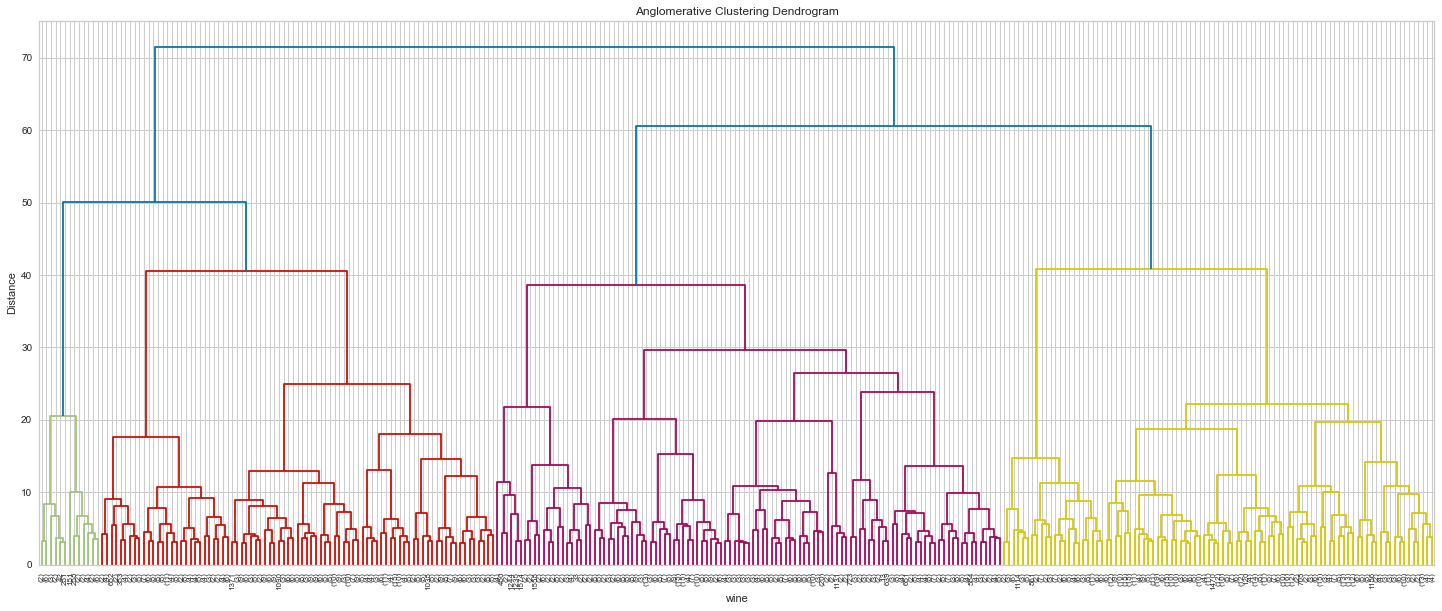

In [7]:

max_d = 200

plt.figure(figsize=(25, 10))
plt.title('Anglomerative Clustering Dendrogram')
plt.xlabel('wine')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=300,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,      
)
plt.axhline(y=max_d, c='k')
plt.show()


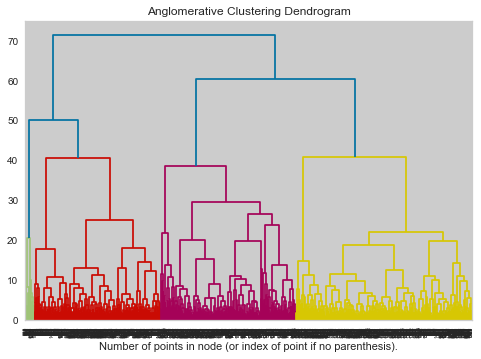

In [8]:

def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

 
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(X)
plt.title("Anglomerative Clustering Dendrogram")

plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### we recognize 4 clusters

In [9]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 0, 0, ..., 2, 2, 1], dtype=int64)

In [10]:
cluster.labels_

array([0, 0, 0, ..., 2, 2, 1], dtype=int64)

In [11]:
df_scaled=pd.DataFrame(X,columns=df0.columns)

In [12]:
df_scaled['cluster']=pd.DataFrame(cluster.labels_)

In [13]:
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,2
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,2
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,2
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,2


In [14]:
cluster_profile = df_scaled.groupby('cluster').mean()

In [15]:
cluster_profile['count_in_each_segments'] = df_scaled.groupby('cluster')['alcohol'].count().values

In [16]:
df_scaled = df_scaled.reset_index()
df_scaled.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster
0,0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,2
4,4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


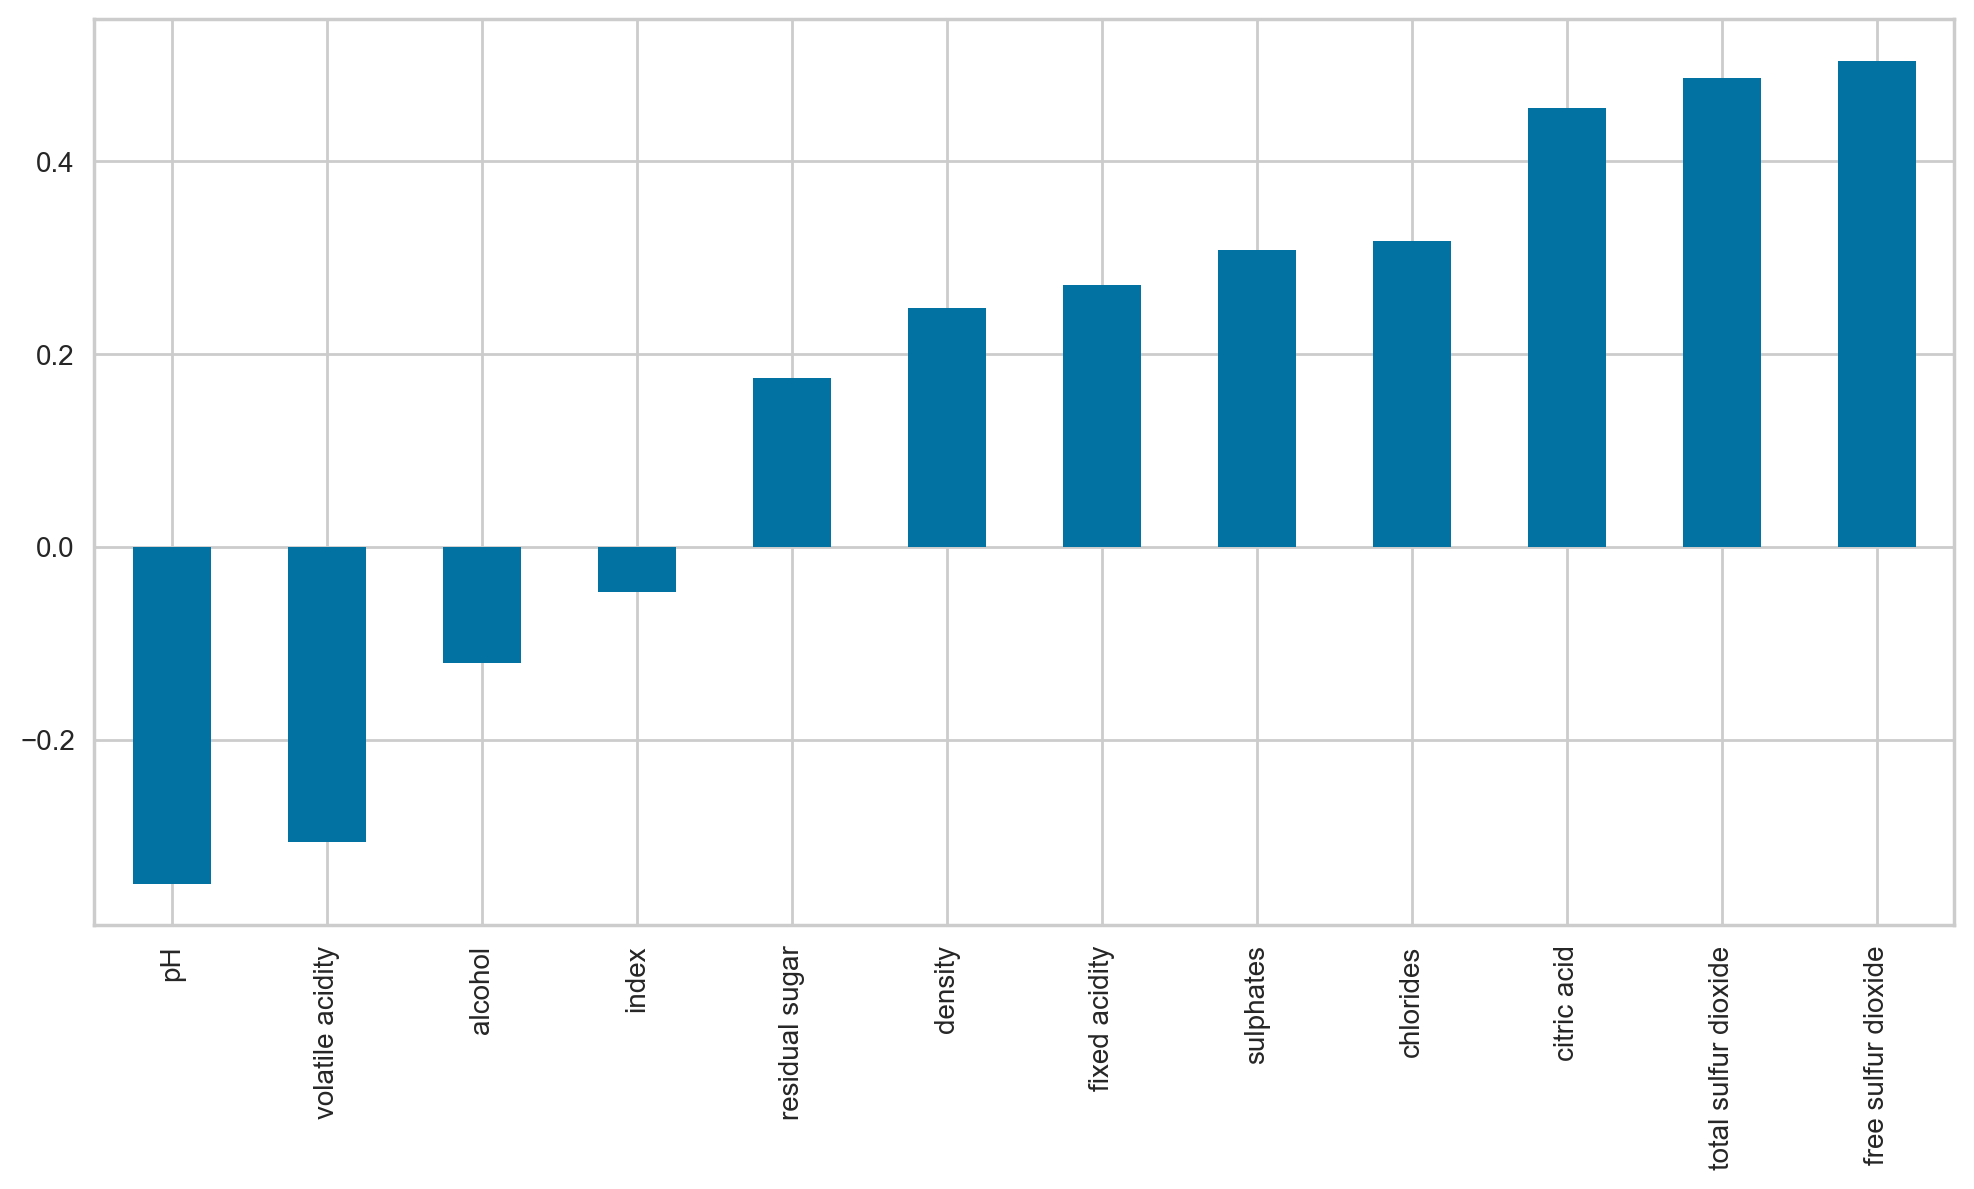

In [17]:
plt.figure(figsize=(12,6),dpi=200)
df_scaled.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')

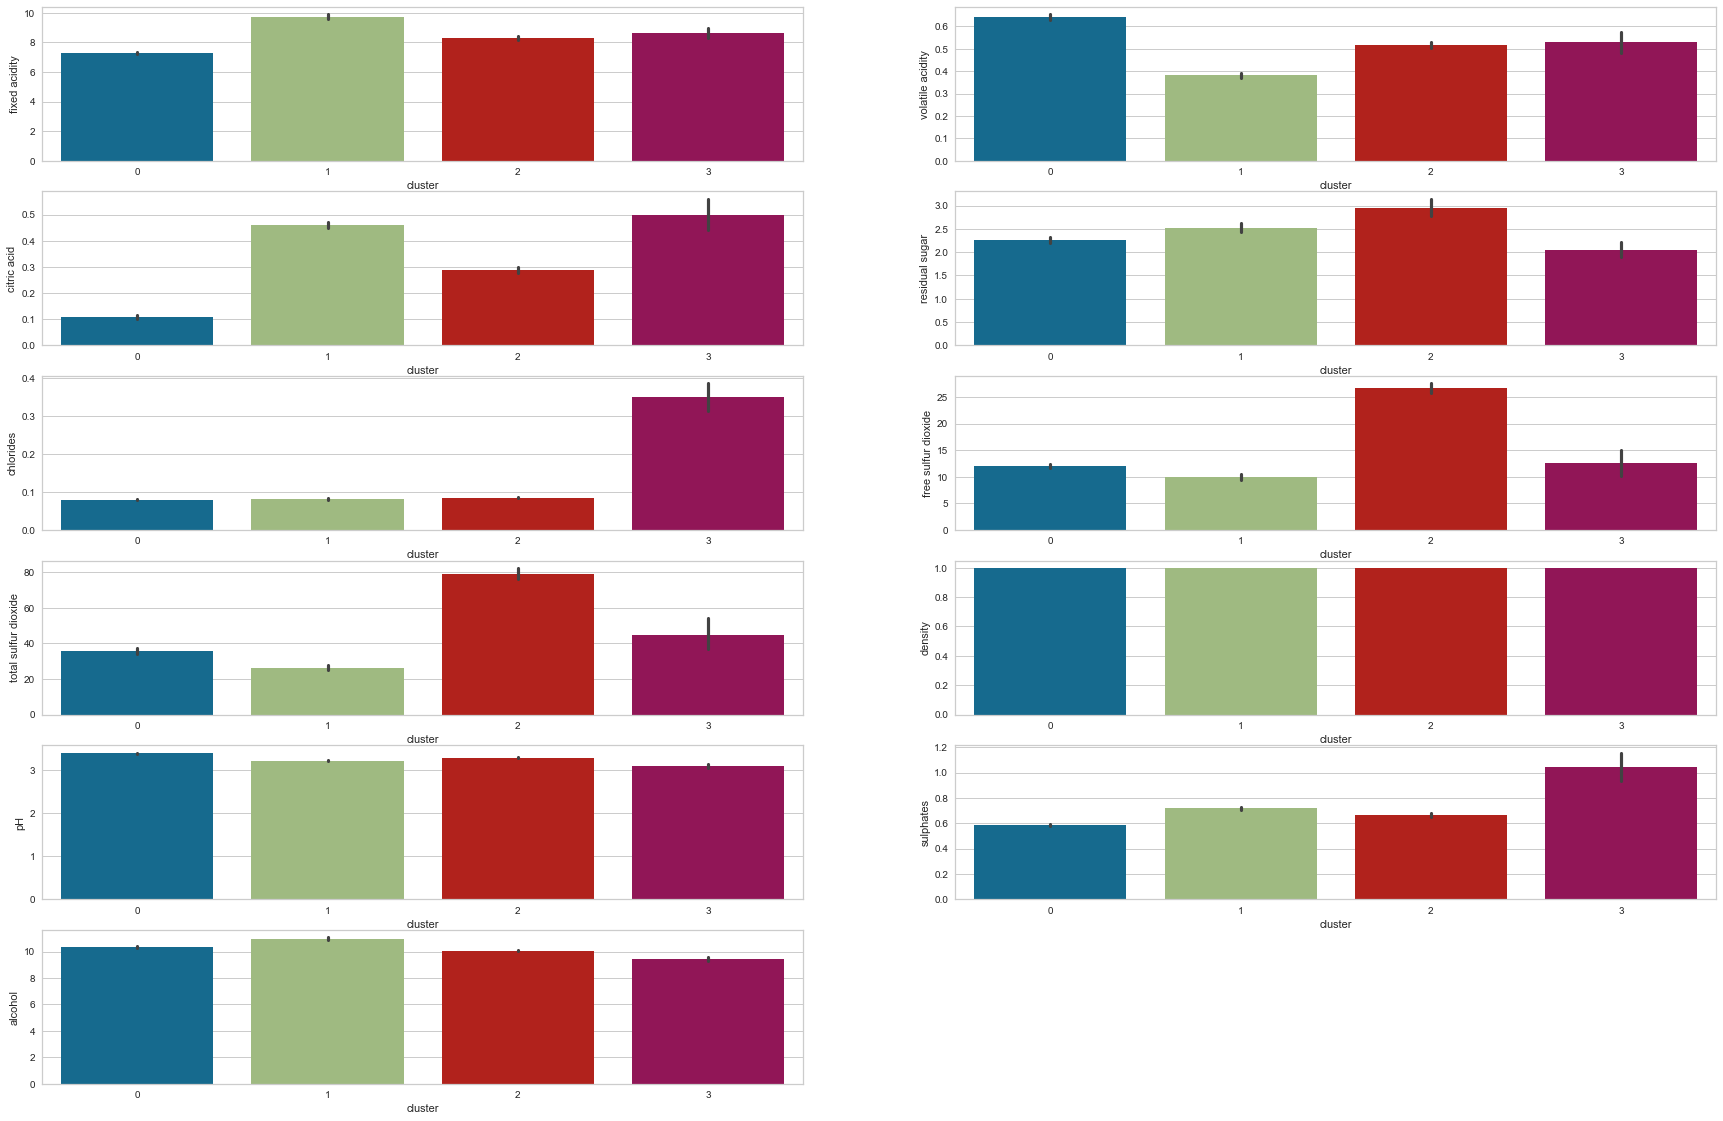

In [18]:
columns = list(df0)

plt.figure(figsize = (30,30))

for i, column in enumerate(columns):
    ax = plt.subplot(9, 2, i + 1) 
    sns.barplot(x = df_scaled['cluster'], y = df0[column], ax=ax)

plt.show()

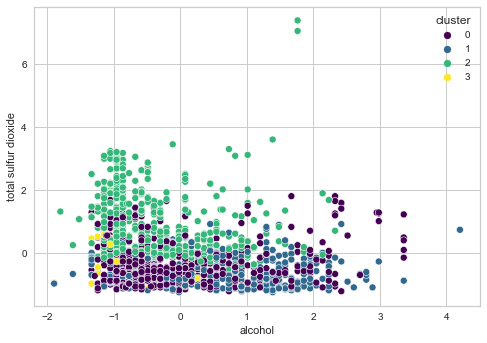

In [19]:
sns.scatterplot(data=df_scaled,x='alcohol',y='total sulfur dioxide',hue=df_scaled['cluster'],palette='viridis')

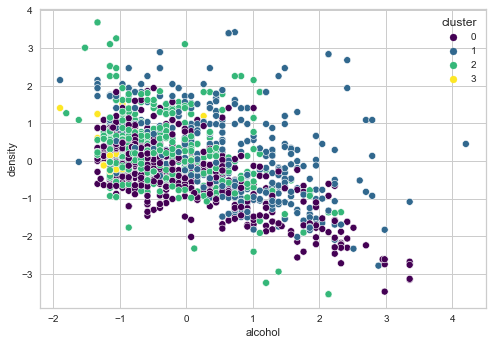

In [20]:
sns.scatterplot(data=df_scaled,x='alcohol',y='density',hue=df_scaled['cluster'],palette='viridis')

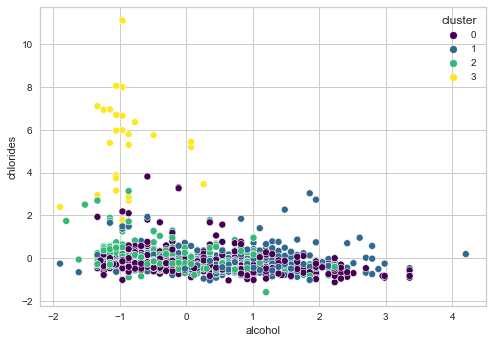

In [21]:
sns.scatterplot(data=df_scaled,x='alcohol',y='chlorides',hue=df_scaled['cluster'],palette='viridis')

### we see some overlap in scatterplots of some of the 4 clusters in alcohol vs other variable relationships

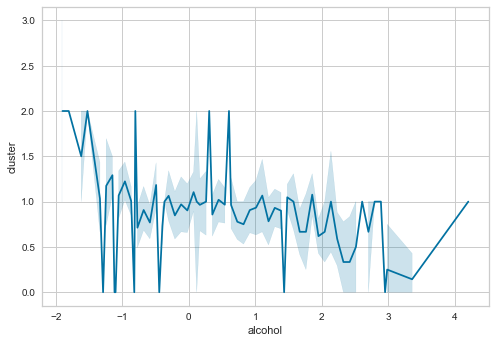

In [29]:
sns.lineplot(data=df_scaled,x='alcohol',y='cluster',palette='viridis')

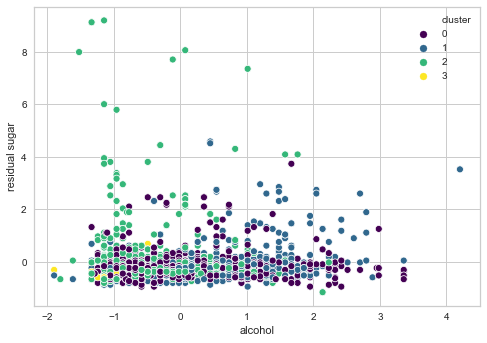

In [28]:
sns.scatterplot(data=df_scaled,x='alcohol',y='residual sugar',hue=df_scaled['cluster'],palette='viridis')

In [29]:
df_scaled['quality']=df1['quality'].copy()

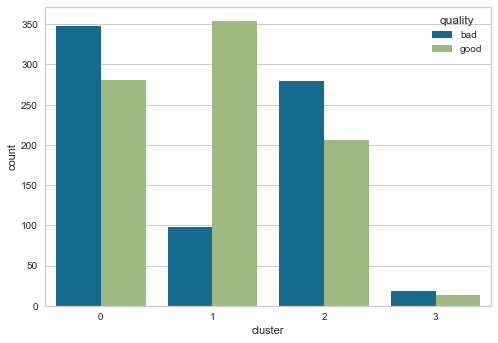

In [30]:
sns.countplot(df_scaled['cluster'],hue=df_scaled['quality'])

### here with the countplot we can realize that cluster 3 is really small while 1 has the mostly good quality wine so clustering did some good job probably(we brought back quality after clustering)

In [32]:
df4=df_scaled.drop(columns='cluster')

<Figure size 1440x720 with 0 Axes>

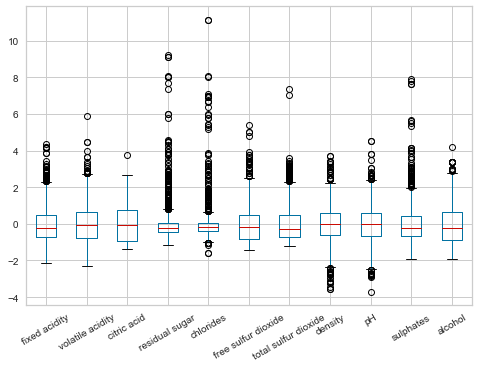

In [34]:
plt.figure(figsize = (20,10))

df4.plot(kind='box');
plt.xticks(rotation=30);